In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from mlxtend.plotting import plot_confusion_matrix


In [2]:
import gradio as gr
import warnings
warnings.filterwarnings("ignore")

c:\Users\theya\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df =pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


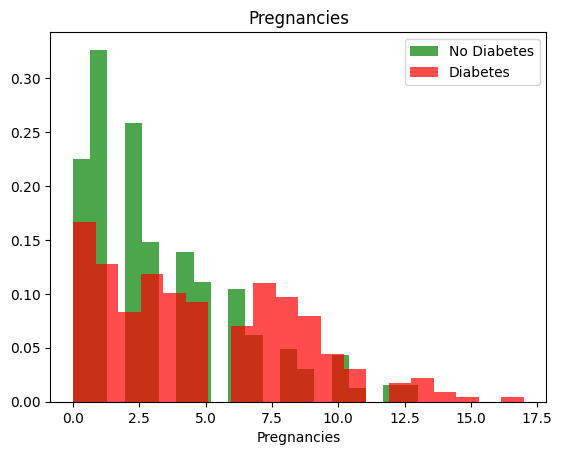

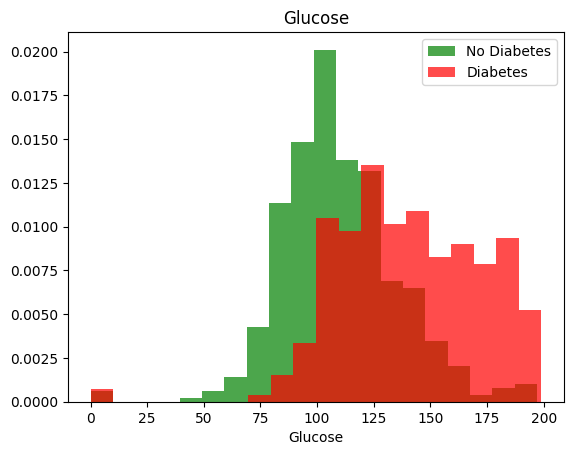

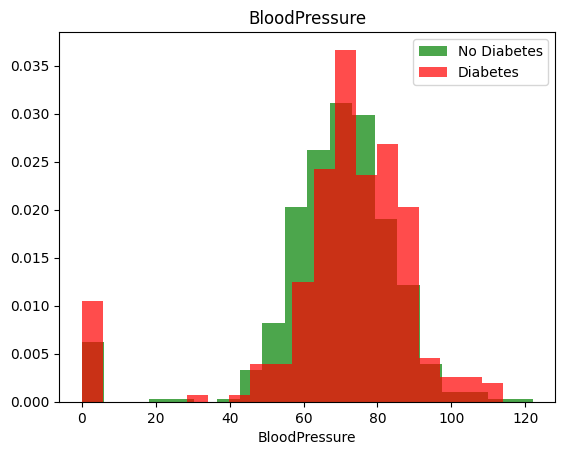

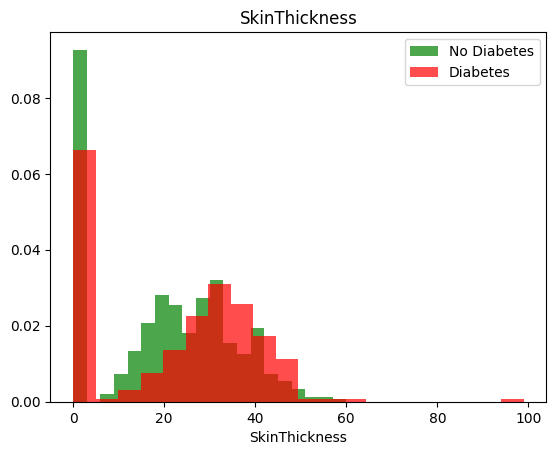

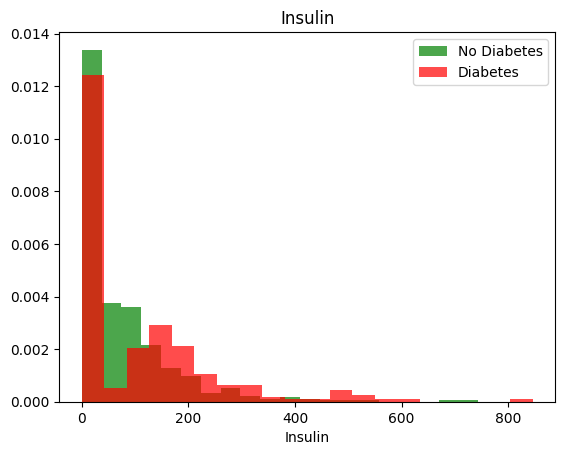

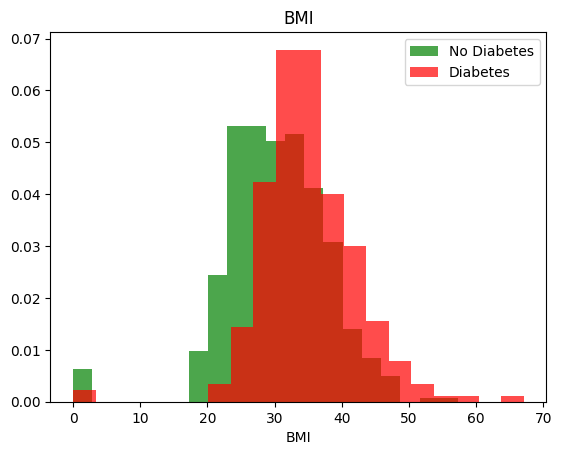

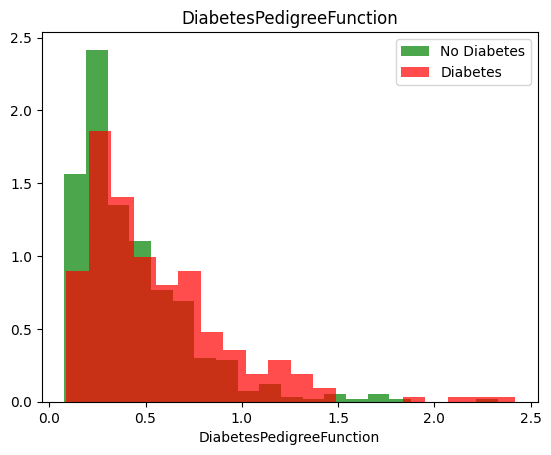

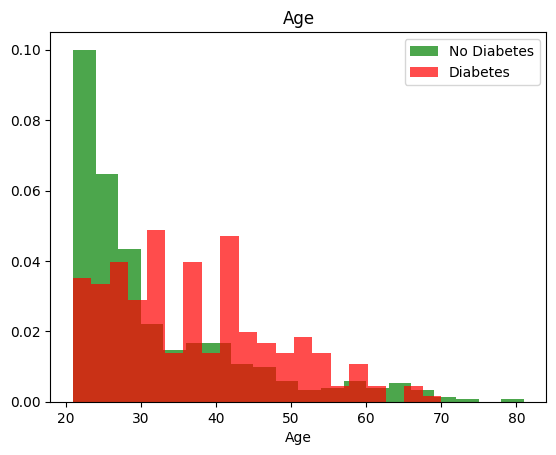

In [4]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(df[df['Outcome']==0][label], color ='green', label ='No Diabetes', alpha =0.7, density = True, bins =20)
  plt.hist(df[df['Outcome']==1][label], color ='red', label ='Diabetes', alpha =0.7, density = True, bins =20)
  plt.title(label)
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [5]:
X= df.drop(columns ='Outcome', axis =1).values
y= df['Outcome'].values

In [6]:
#Data Preprocessing

In [7]:
scaler = StandardScaler()
scaler.fit(X)
X= scaler.transform(X)

In [8]:
y = np.reshape(y,(-1,1))
data = np.hstack((X, y))
transformed_df =pd.DataFrame(data, columns =df.columns )

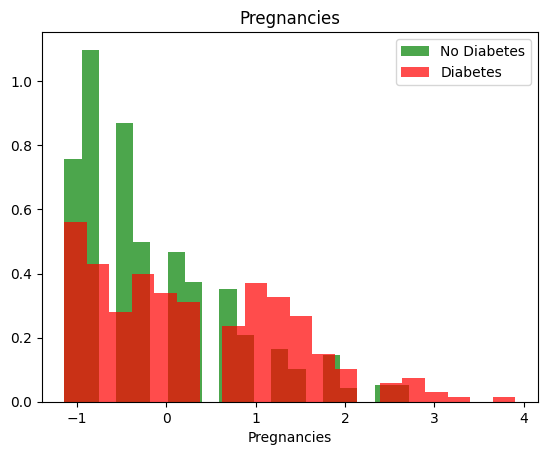

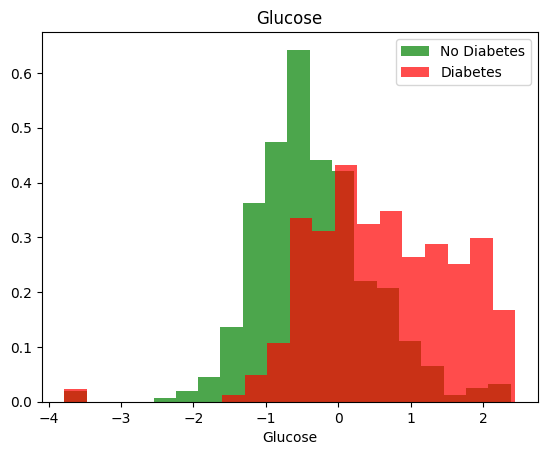

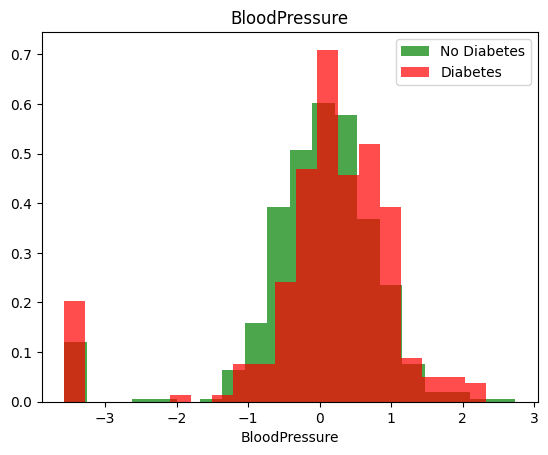

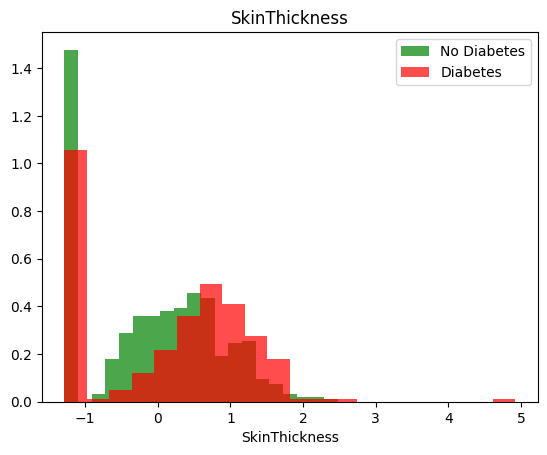

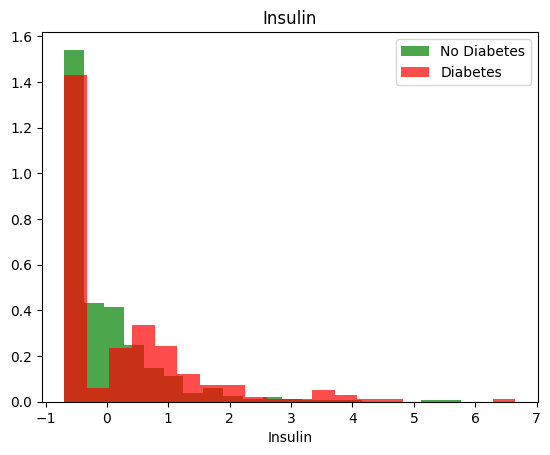

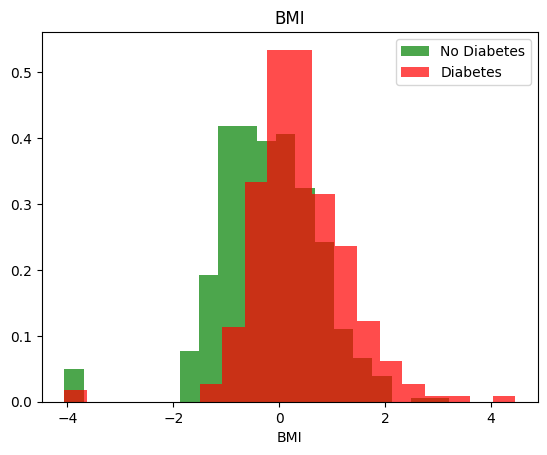

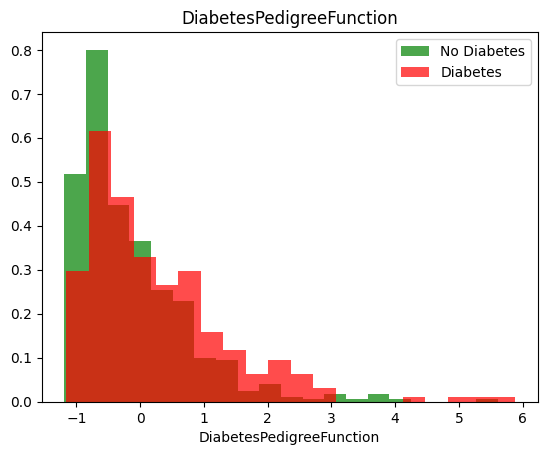

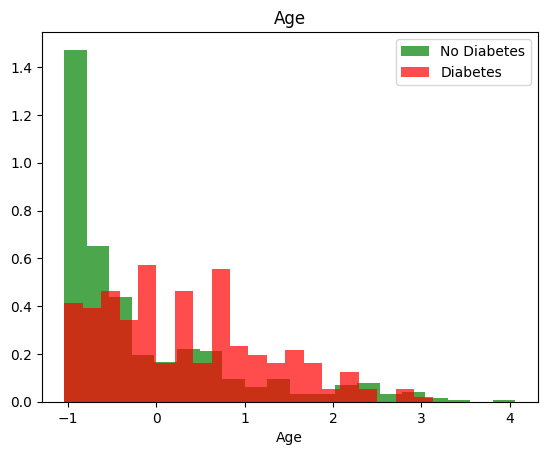

In [9]:
for i in range(len(df.columns[:-1])):
  label = df.columns[i]
  plt.hist(transformed_df[transformed_df['Outcome']==0][label], color ='green', label ='No Diabetes', alpha =0.7, density = True, bins =20)
  plt.hist(transformed_df[transformed_df['Outcome']==1][label], color ='red', label ='Diabetes', alpha =0.7, density = True, bins =20)
  plt.title(label)
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [10]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [11]:
#Random OverSampling

In [12]:
over = RandomOverSampler()
X, y = over.fit_resample(X,y)
y=np.reshape(y,(-1,1))
data =np.hstack((X,y))
transformed_df = pd.DataFrame(data, columns =df.columns)
transformed_df['Outcome'].value_counts()

Outcome
1.0    500
0.0    500
Name: count, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify =y, random_state=2)
#SVM Machine Learning
classifierSVM = svm.SVC(kernel ='rbf')
classifierSVM.fit(X_train, y_train)
X_train_pred = classifierSVM.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
X_test_pred = classifierSVM.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print(test_data_accuracy)

0.7733333333333333


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

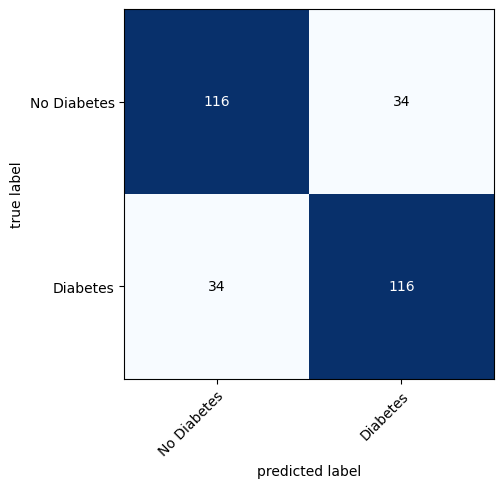

In [14]:
##Plot confusion matrix
mat = confusion_matrix(y_test, X_test_pred)
plot_confusion_matrix(conf_mat =mat, class_names =['No Diabetes', 'Diabetes'])

In [15]:
#SVM Input Sample
input_data =(1,189,60,23,846,30.1,0.398,59)
input =np.asarray(input_data).reshape(1,-1)
stddata =scaler.transform(input)
prediction = classifierSVM.predict(stddata)
if(prediction[0]==0):
  print('Non Diabetes')
else:
  print('Diabetes')

Diabetes


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify =y, random_state=2)
#Random Forest Machine Learning
classifierRF = RandomForestClassifier(n_estimators =100)
classifierRF.fit(X_train, y_train)
X_train_pred = classifierRF.predict(X_train)
training_data_accuracy = accuracy_score(X_train_pred, y_train)
X_test_pred = classifierRF.predict(X_test)
test_data_accuracy = accuracy_score(X_test_pred, y_test)
print(test_data_accuracy)

0.8366666666666667


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

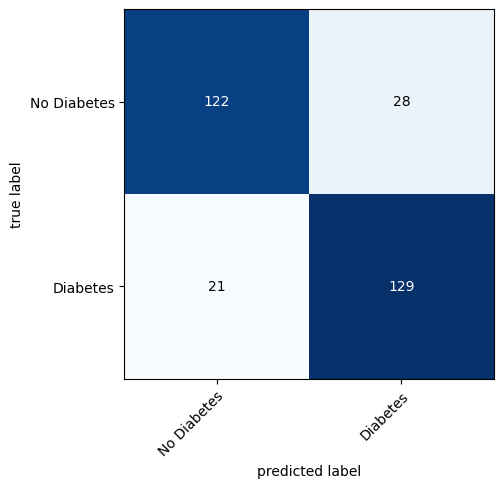

In [17]:
##Plot confusion matrix
mat = confusion_matrix(y_test, X_test_pred)
plot_confusion_matrix(conf_mat =mat, class_names =['No Diabetes', 'Diabetes'])

In [18]:
#RF Input Sample
input_data =(1,189,60,23,846,30.1,0.398,59)
input =np.asarray(input_data).reshape(1,-1)
stddata =scaler.transform(input)
prediction = classifierRF.predict(stddata)
if(prediction[0]==0):
  print('Non Diabetes')
else:
  print('Diabetes')


def RF(Pregnancies, Glucose, Blood_Pressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree, Age):

  input_data1 =np.array([Pregnancies, Glucose, Blood_Pressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree, Age])
  input =input_data1.reshape(1,-1)
  stddata = scaler.transform(input)
  prediction = classifierRF.predict(stddata)
  if(prediction[0]==0):
    print('Non Diabetes')
  else:
    print('Diabetes')


Diabetes


In [19]:
#Gradient Descent Artificial Neural Network Approach
modelNN = tf.keras.Sequential([
    tf.keras.layers.Dense(16, input_dim=8, activation ="relu"),
    tf.keras.layers.Dense(16, activation ="relu"),
     tf.keras.layers.Dense(1, activation ="sigmoid")
])

In [20]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
loss = tf.keras.losses.BinaryCrossentropy()
modelNN.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [21]:
#Implementing K Fold Computation
k=10
kf = KFold(n_splits=k, random_state=None
           )

In [22]:
acc_score =[]
loss_score =[]
val_score =[] # to check for overfitting
val_loss =[]

for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index,:], X[test_index,:]
  y_train, y_test = y[train_index], y[test_index]
  modelNN.fit(X_train, y_train, epochs=100, validation_split =0.2)
  loss, acc = modelNN.evaluate(X_test, y_test)
  acc_score.append(acc)
  loss_score.append(loss)

avg_acc_score = sum(acc_score) / k
avg_loss_score = sum(loss_score) / k
print("Average Accuracy: ", avg_acc_score)
print("Average Loss: ", avg_loss_score)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4094 - loss: 0.7141 - val_accuracy: 0.6000 - val_loss: 0.6821
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6405 - loss: 0.6641 - val_accuracy: 0.5222 - val_loss: 0.6940
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6631 - loss: 0.6359 - val_accuracy: 0.5000 - val_loss: 0.7137
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7020 - loss: 0.6082 - val_accuracy: 0.5389 - val_loss: 0.7140
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7299 - loss: 0.5750 - val_accuracy: 0.5722 - val_loss: 0.7136
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7368 - loss: 0.5600 - val_accuracy: 0.6056 - val_loss: 0.6898
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7329 - loss: 0.5500 - val_accuracy: 0.6167 - val_loss: 0.7078
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7689 - loss: 0.5068 - val_accuracy: 0.6389 - 

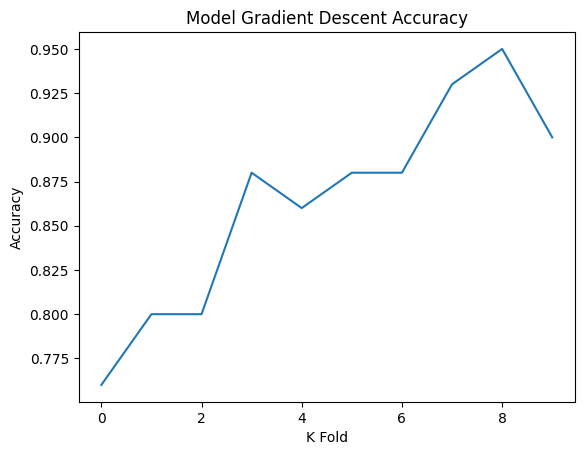

Text(0.5, 0, 'K Fold')

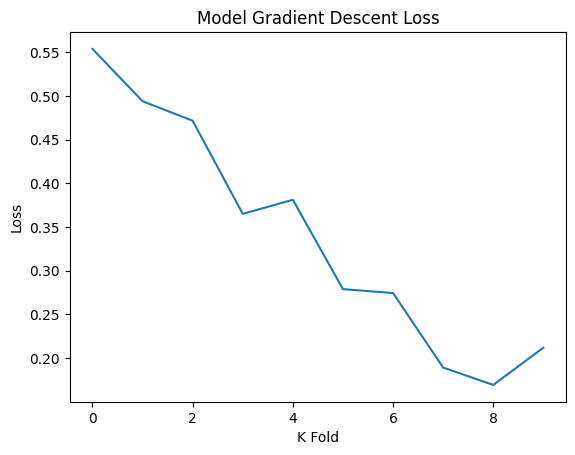

In [23]:
plt.plot(acc_score)
plt.plot(val_score)
plt.title('Model Gradient Descent Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('K Fold')

plt.show()
plt.plot(loss_score)
plt.title('Model Gradient Descent Loss')
plt.ylabel('Loss')
plt.xlabel('K Fold')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

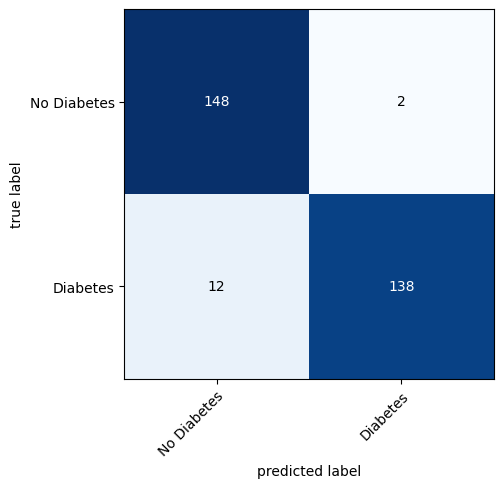

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, stratify =y, random_state=2)
y_pred = modelNN.predict(X_test)
y_pred_round = np.where(y_pred >= 0.5,1,0)
mat = confusion_matrix(y_test, y_pred_round)
plot_confusion_matrix(conf_mat =mat, class_names =['No Diabetes', 'Diabetes'])

In [25]:
 #Gradient Descent Input Sample
input_data =(1,189,60,23,846,30.1,0.398,59)
input =np.asarray(input_data).reshape(1,-1)
stddata =scaler.transform(input)
prediction = modelNN.predict(stddata)
if(prediction[0]>=0.5):
  print('Diabetes')
else:
  print('Non Diabetes')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Diabetes


In [26]:
#Gradient Descent Neural Network Approach
def GDNN(Pregnancies, Glucose, Blood_Pressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree, Age):

  input_data1 =np.array([Pregnancies, Glucose, Blood_Pressure, SkinThickness, Insulin, BMI, Diabetes_Pedigree, Age])
  input =input_data1.reshape(1,-1)
  stddata = scaler.transform(input)
  prediction = modelNN.predict(stddata)
  if(prediction[0]>=0.5):
    print('Diabetes')
  else:
    print('Non Diabetes')


In [27]:
RF(1,189,60,23,846,30.1,0.398,59)

Diabetes


In [28]:
GDNN(1,189,60,23,846,30.1,0.398,59)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Diabetes


In [31]:
iface = gr.Interface(
    fn = GDNN,
    inputs = [
        gr.Slider(0, 100, label="No. of Pregnancies"),
        gr.Slider(0, 1000, label="Glucose Levels"),
        gr.Slider(0, 1000, label="Blood Pressure Levels"),
        gr.Slider(0, 500, label="Skin Thickness"),
        gr.Slider(0, 1000, label="Insulin"),
        gr.Slider(0, 50, label="BMI"),
        gr.Slider(0, 5, label="Diabetes Pedigree"),
        gr.Slider(0, 200, label="Age")
    ],
    outputs="text", 
    description="Dataaaaa!!!!"
)

iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Diabetes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Diabetes
